## Advanced Control for Robotics - Homework 4

<p align="right"> 涂志鑫 12131094 </p>
<p align="right"> 2022.04 </p>


#### Problem 1

#### Solution: 
（a) 
The pose of frame{A} is $^OT_A = (R,P)$, while it is moving with $\nu=\left[ \begin{matrix} w \\  v  \end{matrix}\right]$, so the derivate of the $^oX_A$ is:
$$\frac{d}{dt}[^oX_A] =\left[ \begin{matrix} \dot{R} & 0 \\  ({[p]w})' & \dot{R}  \end{matrix}\right] = \left[ \begin{matrix} w\times R & 0 \\  (\dot{[p]}w+[p]\dot{w}) & w\times R  \end{matrix}\right] =\left[ \begin{matrix} [w] R & 0 \\  ([\dot{p}]w+[p]\dot{w}) & [w]R  \end{matrix}\right]$$
Let's denote that $\dot{p} = V+W\times p$,$[a\times b] = [a][b]-[b][a]$ , the third term can be simplified as 
$$ \begin{aligned}([\dot{p}]w+[p]\dot{w}) &= [v]R+[w\times p]R+[p][w]R\\
& = [v]R +[w][p]R - [p][w]R+ [p][w]R \\ & =[v]R + [w][p]R
\end{aligned}$$

Therefore,
$$\begin{aligned}
    \frac{d}{dt}[^oX_A] &= \left[ \begin{matrix} [w] R & 0 \\  [v]R + [w][p]R& [w]R  \end{matrix}\right]\\ & = \left[ \begin{matrix} [w]  & 0 \\  [v] & [w]  \end{matrix}\right] \left[ \begin{matrix} R & 0 \\  [p]R& R  \end{matrix}\right]\\
    & = \left[ \begin{matrix} [w]  & 0 \\  [v] & [w]  \end{matrix}\right] {^oX_A}
\end{aligned}$$ 


#### Problem 2

##### Solution:
Assume $^0C=[C_x(t),0,0]^T$.
According to the previous problem, we can easily know the $^c\nu = [0,v/r,0,0,0,0]^T$.
The twist of the body in frame{0} is $^0\nu =[0,\frac{v}{r},0,0,0,\frac{C_x(t) v}{r}]^T$.
(a) 
Because the cylinder rolls with a constant velocity $v$, the derivate of the $C_x(t)$ is $C'_x(t) = v $
Find the $^oA$，since frame{o} is fixed, the expression of $^o\mathbb{A}$ is
$$^o\mathbb{A} = \frac{d}{dt}[^o\nu] = \left[ \begin{matrix} 0\\0\\0\\0\\0\\ C'_x(t)v/r \end{matrix}\right] = \left[ \begin{matrix} 0\\0\\0\\0\\0\\ \frac{v^2}{r} \end{matrix}\right]$$

(b)
$${^c}X_o = \left[ \begin{matrix} I_{3\times3}  & 0 \\  [^oP_c] & I_{3\times3}  \end{matrix}\right]  $$
$$^c\mathbb{A} =  {^c}\dot{\nu}_c + {^c}\nu \times {^c}\nu_c = {^c}X_o{^o}\mathbb{A}= \left[ \begin{matrix} I_{3\times3}  & 0 \\  [^oP_c] & I_{3\times3}  \end{matrix}\right]\left[ \begin{matrix} 0\\0\\0\\0\\0\\ \frac{v^2}{r} \end{matrix}\right] = \left[ \begin{matrix} 0\\0\\0\\0\\0\\ \frac{v^2}{r} \end{matrix}\right] $$


#### Problem 3

#### Solution:
$\dot{M}-2c = \sum_i(\dot{J_i^T}I_iJ_i + J_i^T\dot{I_i}J_i + J_i^T I_i\dot{J_i}) - 2\sum_i(J_i^TI_i\dot{J_i}-J_i^TI_i\nu_i\times J_i-J_i^T\nu_i\times^*I_iJ_i)$
Denote that $I_i$ is constant, so $\dot{I_i} = 0$, and $I_i$ is a symmetric matrix, $I_i^T = I_i$.

$\dot{M}-2c = \sum_i(\dot{J_i^T}I_iJ_i - J_i^T I_i\dot{J_i} - 2J_i^TI_i\nu_i\times J_i-2J_i^T\nu_i\times^*I_iJ_i)$ 

$\begin{aligned}(\dot{M}-2c)^T &= \sum_i(J_i^TI_i\dot{J_i} - \dot{J_i^T} I_iJ_i - 2J_i^T[\nu_i\times]^T I_iJ_i-2J_i^TI_i[\nu_i\times^*]^TJ_i)\\
& = \sum_i(J_i^TI_i\dot{J_i} - \dot{J_i^T} I_iJ_i + 2J_i^TI_i[\nu\times^*]J_i+ 2J_i^T[\nu_i\times]^TI_iJ_i)
\end{aligned}$  
Denote that $[\nu_i\times]^T = -[\nu\times^*]$.
Therefore,
$$
  (\dot{M}-2c)+(\dot{M}-2c)^T = 0
$$
That is prove that $\dot{M}-2c$ is skew symmetric.




#### Problem 4

#### Solution
(a)
Choose the initial configuration is $\theta_1 = 0.5rad, \theta_2 = 0.5rad$, and start simulating for 4 sec.
<div align=center>
<img src=pro4-1.png width = 50% />
</div>
<div align=center>
<img src=pro4-2.png width = 50% />
</div>
<div align=center>
<img src=pro4-3.png width = 50% />
</div> 
The plot of joint trajectories for the simulation is as shown below.
<div align=center>
<img src=plottraj.png width = 50% />
</div>

In [16]:
# problem 4nstant reference to the joint 
import numpy as np
import matplotlib.pyplot as plt
import pydot
from IPython.display import display, SVG, clear_output

from pydrake.math import RigidTransform, RollPitchYaw
from pydrake.multibody.plant import AddMultibodyPlantSceneGraph
from pydrake.all import (Parser, StartMeshcat, DiagramBuilder,
                        MeshcatVisualizerCpp, JacobianWrtVariable,
                        MakeRenderEngineVtk, RenderEngineVtkParams,
                        Simulator, CoulombFriction, HalfSpace, 
                        RotationMatrix, RotationalInertia)
from pydrake.geometry import (
    Box,
    Cylinder
)

from pydrake.multibody.tree import (
    PrismaticJoint,
    UnitInertia,
    SpatialInertia,
    RevoluteJoint,
    FixedOffsetFrame,
    WeldJoint
)

from manipulation.meshcat_cpp_utils import MeshcatJointSliders
from manipulation.scenarios import AddMultibodyTriad
import modern_robotics as mr
from pydrake.all import LogVectorOutput
import time

In [17]:
meshcat = StartMeshcat()

Meshcat is now available at http://localhost:7000


Text(0, 0.5, 'joint angle(rad)')

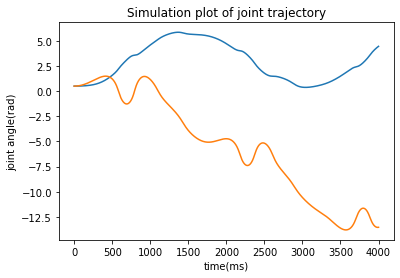

In [19]:
# Build robot from code
builder = DiagramBuilder()
step_size = 1e-4
plant, scene_graph = AddMultibodyPlantSceneGraph(builder, step_size)

# Some parameters
L0 = 0.5
L1 = 0.7
L2 = 0.4

h = 0.06
w = 0.08
r = 0.05

m = 1

RGBA_Color = [0.5, 0.5, 0.5, 1]
mu = 0.4

my_model_instance = plant.AddModelInstance("my_robot")

inertia_link_0 = SpatialInertia.MakeFromCentralInertia(
    m, [0, 0, L0/2], RotationalInertia(m*(3*r**2+L0**2)/12, m*(3*r**2+L0**2)/12, m*r**2/2))
inertia_link_1 = SpatialInertia.MakeFromCentralInertia(
    m, [0, 0, L1/2], RotationalInertia(m*(w**2+L1**2)/12, m*(h**2+L1**2)/12, m*(h**2+w**2)/12))
inertia_link_2 = SpatialInertia.MakeFromCentralInertia(
    m, [0, 0, L2/2], RotationalInertia(m*(w**2+L2**2)/12, m*(h**2+L2**2)/12, m*(h**2+w**2)/12))

link_0 = plant.AddRigidBody(
    "link_0", my_model_instance, inertia_link_0)
link_1 = plant.AddRigidBody(
    "link_1", my_model_instance, inertia_link_1)
link_2 = plant.AddRigidBody(
    "link_2", my_model_instance, inertia_link_2)


plant.RegisterVisualGeometry(
    link_0,
    RigidTransform(RollPitchYaw(0, 0, 0), [0, 0, L0/2]),
    Cylinder(r, L0),
    "link_0",
    RGBA_Color)
plant.RegisterVisualGeometry(
    link_1,
    RigidTransform(RollPitchYaw(0, 0, 0), [0, 0, L1/2]),
    Box(h, w, L1),
    "link_1",
    RGBA_Color)
plant.RegisterVisualGeometry(
    link_2,
    RigidTransform(RollPitchYaw(0, 0, 0), [0, 0, L2/2]),
    Box(h, w, L2),
    "link_2",
    RGBA_Color)

frame_on_link_0 = plant.AddFrame(FixedOffsetFrame(
    link_0,
    RigidTransform(RollPitchYaw(0, 0, 0), [0, 0, L0])))

frame_on_link_1 = plant.AddFrame(FixedOffsetFrame(
    link_1,
    RigidTransform(RollPitchYaw(0, 0, 0), [0, 0, L1])))

plant.AddJoint(RevoluteJoint(
    name="joint_0_to_1", frame_on_parent=frame_on_link_0,
    frame_on_child=link_1.body_frame(), axis=[1, 0, 0]))

plant.AddJoint(RevoluteJoint(
    name="joint_1_to_2", frame_on_parent=frame_on_link_1,
    frame_on_child=link_2.body_frame(), axis=[1, 0, 0]))

plant.WeldFrames(
    frame_on_parent_P=plant.world_frame(),
    frame_on_child_C=link_0.body_frame(),
    X_PC=RigidTransform(RollPitchYaw(0, 0, 0), [0, 0, 0]))

# Draw RGB frames for visualization
for body_name in ["link_0", "link_1", "link_2"]:
    AddMultibodyTriad(plant.GetFrameByName(body_name), scene_graph, 0.20, 0.008)

# Finalize and visualize
plant.Finalize()

renderer_name = "renderer"
scene_graph.AddRenderer(
    renderer_name, MakeRenderEngineVtk(RenderEngineVtkParams()))

meshcat.Delete()
meshcat_vis = MeshcatVisualizerCpp.AddToBuilder(
    builder, scene_graph, meshcat)

# logger_output = LogVectorOutput(plant.get_body_poses_output_port(), builder)
diagram = builder.Build()

diagram_context = diagram.CreateDefaultContext()
plant_context = plant.GetMyMutableContextFromRoot(diagram_context)
plant.SetPositions(plant_context, plant.GetModelInstanceByName("my_robot"),
                   [0.5, 0.5])  # theta1, theta2 the choosen initial config


# a = plant.get_body_poses_output_port().Eval(plant_context)
# print(a)

diagram.Publish(diagram_context)

# simulator = Simulator(diagram, diagram_context)
# simulator.set_publish_every_time_step(True)
# simulator.set_target_realtime_rate(1)
# simulator.Initialize()
# diagram.Publish(diagram_context)
# simulator.AdvanceTo(4)  #siulation for 4 sec


# #plot the joint traj

# please write your own simulator below

simulator = Simulator(diagram, diagram_context)
simulator.set_publish_every_time_step(True)
simulator.set_target_realtime_rate(1)
simulator.Initialize()
diagram.Publish(diagram_context)

simulation_time = 4
step_time = 0.001
q_list= np.zeros((1,2))
q_list = plant.GetPositions(plant_context)
# print(time.time())
for i in np.arange(0,simulation_time,step_time):
    q_list = np.vstack((q_list,plant.GetPositions(plant_context)))
    simulator.AdvanceTo(i)  #siulation for 4 sec
# print(time.time())

#plot the joint traj
plt.plot(q_list)
plt.title('Simulation plot of joint trajectory')
plt.xlabel('time(ms)')
plt.ylabel('joint angle(rad)')

(b) 

In [14]:
#problem 4(b)   (RNEA ALGORITHM)
import numpy as np
import modern_robotics as mr


def ID(q,dq,ddq,Fext,N,Si,M):   #RNEA ALGORITHM
    Si_0 = np.zeros((6,N)) 
    Si_0[:,0] = np.matmul(mr.Adjoint(M[4:8,:]),Si[:,0])
    Si_0[:,1] = np.matmul(mr.Adjoint(M[8:12,:]),Si[:,0])
    g = 9.81
    A_i[0] = -g
    nu_i = np.zeros((6,N+1))
    A_i = np.zeros((6,N+1))
    wrench_i = np.zeros((6,N+1))
    # Forward pass
    for i in range(1,N+1):
        if i==1:
            T_ito0 = mr.FKinSpace( M[4*i:4*i+4,:], Si_0[:,0:i], q[0:i] )
            T_pito0 = M[0:4,:]
        else:
            T_ito0 = mr.FKinSpace( M[4*i:4*i+4,:], Si_0[:,0:i], q[0:i] )
            T_pito0 = mr.FKinSpace( M[4*(i-1):4*(i-1)+4,:], Si_0[:,0:i-1], q[0:i-1] )
        T_pitoi = np.matmul(mr.TransInv(T_ito0),T_pito0)
        X_ptoi = mr.Adjoint(T_pitoi)
        nu_i = X_ptoi.dot(nu_i[i-1]) + Si[:,i-1]*dq[i-1]         #S_i and dq_i index are i-1
        A_i[i] = X_ptoi.dot(A_i[i-1]) + Si[:,i-1]*ddq[i-1] + np.matmul(mr.adV(nu_i),Si[:,i-1])*dq[i-1] 
        #wrench_i = 
        
        
# Some parameters
L0 = 0.5
L1 = 0.7
L2 = 0.4

h = 0.06
w = 0.08
r = 0.05

m = 1
N = 2

Si = np.zeros((6,N))        #si in body frame
Si_0 = np.zeros((6,N))      #si in fixed frame
Si = np.array([[0, 0,  1,  0, 0, 0],
                    [0, 0,  1,  0, 0, 0]]).T

M = np.zeros(((N+1)*4,4))   #transformation matrix of all frames
M[0:4,:] = np.array([[1, 0,  0, 0],
                      [ 0, 1,  0, 0],
                      [ 0, 0, 1, 0],
                      [ 0, 0,  0, 1]])

M[4:8,:] = np.array([[1, 0,  0, 0],
                      [ 0, 1,  0, 0],
                      [ 0, 0, 1, L0],
                      [ 0, 0,  0, 1]])

M[8:12,:] = np.array([[1, 0,  0, 0],
                      [ 0, 1,  0, 0],
                      [ 0, 0, 1, L1],
                      [ 0, 0,  0, 1]])
# Si_0[:,0] = np.matmul(mr.Adjoint(M[4:8,:]),Si[:,0])
# Si_0[:,1] = np.matmul(mr.Adjoint(M[8:12,:]),Si[:,0])
#T = mr.FKinSpace(M,Si_0,thetalist)
Ic = np.zeros((N*6,6))
#Ic[0] = 


(c) 

In [ ]:
#problem 4(c)   (Forward dynamics function)
